In [57]:
pip install faker

Note: you may need to restart the kernel to use updated packages.



# Importing libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from faker import Faker

import warnings
warnings.filterwarnings('ignore')

In [71]:
dt1 = Faker()

In [72]:
def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(dt1.name())
   return name

In [73]:
name = create_names(362806)

In [ ]:
dt_name = pd.DataFrame(list(zip(name)),columns = ['Name'])

In [75]:
dt_name.head()

,Name
0,Daniel Mcfarland
1,Rhonda Hansen
2,Kevin Flores
3,Martha Sanders
4,Ryan Reese


In [76]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'], 
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [77]:
dt_race=pd.DataFrame(list, columns = ['Race'])
dt_race.head()

,Race
0,Asian
1,White
2,Hispanic
3,White
4,Black


# Loading the dataset

In [78]:
dt_drugs=pd.read_csv("webmd.csv")

In [79]:
dt_drugs.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Making final dataset

In [80]:
dt_new = pd.concat([dt_name, dt_race], axis=1).reindex(dt_race.index)

In [81]:
data = pd.concat([dt_new, dt_drugs], axis=1).reindex(dt_drugs.index)

In [82]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Daniel Mcfarland,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Rhonda Hansen,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Kevin Flores,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Martha Sanders,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Ryan Reese,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Dataset column description

Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

# Data Exploration

In [83]:
#First five raws
data.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Daniel Mcfarland,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Rhonda Hansen,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Kevin Flores,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Martha Sanders,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Ryan Reese,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [21]:
#Last five raws
data.tail(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,Tyler Clark PhD,Hispanic,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,Robert Price,Black,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,Patricia Palmer,Hispanic,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,John Turner,Hispanic,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,Kyle Gill,Black,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [22]:
#Raws and columns
data.shape

(362806, 14)

In [23]:
#Columns
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [24]:
#Data types
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [25]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [84]:
#Checking for null values
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [85]:
# Unique value count
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 180804 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



In [86]:
# Value counts for each feature
for i in data.columns:
  print("----------------")
  print((data[i].value_counts()).to_frame(),'\n')

----------------
                   Name
Michael Smith       160
Michael Johnson     148
David Smith         112
Robert Smith        112
Christopher Smith   110
...                 ...
Katelyn Mcdonald      1
Sonya Elliott         1
Leslie Snow           1
Douglas George        1
Marie Mason           1

[180804 rows x 1 columns] 

----------------
            Race
White     115565
Hispanic  101963
Black      79927
Asian      65351 

----------------
              Age
45-54       80043
55-64       75136
35-44       55011
25-34       49718
65-74       41216
19-24       24230
75 or over  15226
            12202
13-18        7045
7-12         1644
3-6           838
0-2           497 

----------------
                                                    Condition
Other                                                   49765
Pain                                                    25232
High Blood Pressure                                     23275
Depression                                  

In [87]:
data['Drug'].value_counts().head(20)

cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                                 

# Selection of drug: A particular drug named Lexapro with DrugId 63990 is selected in building a classification model to determine side effects

In [88]:
drug_lexapro= data.loc[(data['Drug'] =='lexapro')]
drug_lexapro.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
28803,Michele Harris,Black,35-44,Anxiousness associated with Depression,2/6/2020,lexapro,63990,1,1,I got horrible brain zaps and very graphic tra...,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
28809,Charles Nicholson,Hispanic,,"""Change of Life"" Signs",1/23/2020,lexapro,63990,3,2,Blah,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
28817,Michael Gallagher,Black,55-64,Depression,1/23/2020,lexapro,63990,5,3,It has helped my depression but not my anxiety...,3,Male,"Nausea , dry mouth , trouble sleeping , con...",0
28826,Scott Mckee,Hispanic,65-74,Depression,1/21/2020,lexapro,63990,3,1,Was nauseated almost immediately. Diareaha and...,1,Female,"Nausea , dry mouth , trouble sleeping , con...",0
28834,Chelsea Payne,Hispanic,75 or over,Anxiousness associated with Depression,12/27/2019,lexapro,63990,4,2,haven't seen much difference.,2,Female,"Nausea , dry mouth , trouble sleeping , con...",0


In [89]:
drug_lexapro.shape

(4134, 14)

In [90]:
drug_lexapro['Condition'].value_counts()

Depression                                1920
Repeated Episodes of Anxiety               921
Panic Disorder                             311
Other                                      244
Major Depressive Disorder                  194
Bipolar Depression                         192
"Change of Life" Signs                     146
Posttraumatic Stress Syndrome               89
Obsessive Compulsive Disorder               69
Anxiousness associated with Depression      47
                                             1
Name: Condition, dtype: int64

In [91]:
drug_lexapro['Condition'].value_counts().sum()

4134

Text(0, 0.5, 'Count')

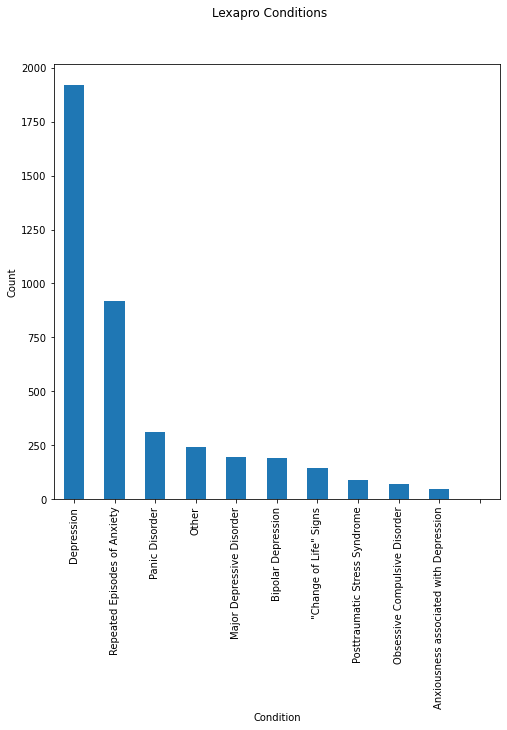

In [92]:
drug_lexapro['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Lexapro Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

Lexapro is mainly used for depression and anxiety related conditions

In [93]:
data_lex = drug_lexapro.copy()
data_copy = data.copy()

# Data PreProcessing

# 1.Handling White Spaces

In [94]:
# Handling instances with whitespaces
for i in data_lex:
    data_lex[i]=np.where(data_lex[i]==" ",np.NAN,data_lex[i])

In [95]:
data_lex.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
28803,Michele Harris,Black,35-44,Anxiousness associated with Depression,2/6/2020,lexapro,63990.0,1.0,1.0,I got horrible brain zaps and very graphic tra...,1.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0
28809,Charles Nicholson,Hispanic,NaN,"""Change of Life"" Signs",1/23/2020,lexapro,63990.0,3.0,2.0,Blah,1.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0
28817,Michael Gallagher,Black,55-64,Depression,1/23/2020,lexapro,63990.0,5.0,3.0,It has helped my depression but not my anxiety...,3.0,Male,"Nausea , dry mouth , trouble sleeping , con...",0.0
28826,Scott Mckee,Hispanic,65-74,Depression,1/21/2020,lexapro,63990.0,3.0,1.0,Was nauseated almost immediately. Diareaha and...,1.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0
28834,Chelsea Payne,Hispanic,75 or over,Anxiousness associated with Depression,12/27/2019,lexapro,63990.0,4.0,2.0,haven't seen much difference.,2.0,Female,"Nausea , dry mouth , trouble sleeping , con...",0.0



# 2.Missing values

In [96]:
#checking missing values
data_lex.isnull().sum()

Name               0
Race               0
Age              175
Condition          1
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          568
Satisfaction       0
Sex              222
Sides              0
UsefulCount        0
dtype: int64

In [97]:
data_lex.shape

(4134, 14)

# Bar plot for missing values

Text(0.5, 1.0, 'Total Missing Values')

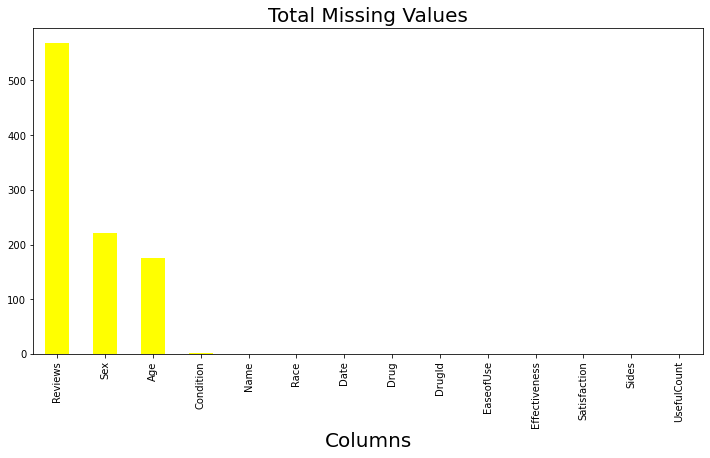

In [98]:
missing = (data_lex.isnull().sum()).sort_values(ascending=False)
missing.plot(kind="bar", figsize = (12,6), fontsize = 10, color='yellow')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [99]:
# Removing rows with null data
data_lex=data_lex.dropna(axis=0)

In [100]:
data_lex.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [101]:
data_lex.shape

(3347, 14)

# 3.Text processing

In [102]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_lex)-1):
    if type(data_lex.iloc[i]['Sides']) != str:
        data_lex.iloc[i]['Sides'] = str(data_lex.iloc[i]['Sides'])

for i in range(0,len(data_lex)-1):
    if type(data_lex.iloc[i]['Reviews']) != str:
        data_lex.iloc[i]['Reviews'] = str(data_lex.iloc[i]['Reviews'])
        
for i in range(0,len(data_lex)-1):
    if type(data_lex.iloc[i]['Condition']) != str:
        data_lex.iloc[i]['Condition'] = str(data_lex.iloc[i]['Condition'])

In [103]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

# 3.1 Sides

In [104]:
data_lex.Sides= data_lex.Sides.apply(cleaning_text)
data_lex.Sides

28803    nausea mouth trouble sleeping constipation tir...
28817    nausea mouth trouble sleeping constipation tir...
28826    nausea mouth trouble sleeping constipation tir...
28834    nausea mouth trouble sleeping constipation tir...
28845    nausea mouth trouble sleeping constipation tir...
                               ...                        
35315    nausea mouth trouble sleeping constipation tir...
35316    nausea mouth trouble sleeping constipation tir...
35317    nausea mouth trouble sleeping constipation tir...
35318    nausea mouth trouble sleeping constipation tir...
35319    nausea mouth trouble sleeping constipation tir...
Name: Sides, Length: 3347, dtype: object

In [105]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_lex['Sides'] = data_lex['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
data_lex['Sides']

28803    nausea mouth trouble sleeping constipation tir...
28817    nausea mouth trouble sleeping constipation tir...
28826    nausea mouth trouble sleeping constipation tir...
28834    nausea mouth trouble sleeping constipation tir...
28845    nausea mouth trouble sleeping constipation tir...
                               ...                        
35315    nausea mouth trouble sleeping constipation tir...
35316    nausea mouth trouble sleeping constipation tir...
35317    nausea mouth trouble sleeping constipation tir...
35318    nausea mouth trouble sleeping constipation tir...
35319    nausea mouth trouble sleeping constipation tir...
Name: Sides, Length: 3347, dtype: object

# 3.2 Reviews

In [107]:
data_lex.review= data_lex.Reviews.apply(cleaning_text)
data_lex.review

28803    horrible brain zaps very graphic tragic dreams...
28817    helped depression anxiety having trouble sleeping
28826    nauseated almost immediately diareaha bedridde...
28834                           haven seen much difference
28845    started taking zoloft after diagnosed with dep...
                               ...                        
35315    have been taking lexapro about weeks medicine ...
35316    took lexapro years never significant effects f...
35317    while using this medication feel much better f...
35318    this drug made feel like should have felt whol...
35319    this medication turned easy going into impulsi...
Name: Reviews, Length: 3347, dtype: object

Removing Stopwords

In [108]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_lex['Reviews'] = data_lex['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
data_lex['Reviews']

28803    I got horrible brain zaps graphic tragic dream...
28817    It helped depression anxiety. And I trouble sl...
28826    Was nauseated almost immediately. Diareaha bed...
28834                                seen much difference.
28845    I started taking Zoloft I diagnosed depression...
                               ...                        
35315    I taking Lexapro 8 weeks. The medicine working...
35316    I took Lexapro years ago never significant eff...
35317    While I using medication I feel much better. I...
35318    This drug made feel like I felt whole life. I ...
35319    This medication turned easy going man impulsiv...
Name: Reviews, Length: 3347, dtype: object

# 3.3 Condition

In [110]:
data_lex.Condition=data_lex.Condition.apply(cleaning_text)
data_lex.Condition

28803    anxiousness associated with depression
28817                                depression
28826                                depression
28834    anxiousness associated with depression
28845                                depression
                          ...                  
35315                 repeated episodes anxiety
35316                        bipolar depression
35317                                     other
35318                                depression
35319                                     other
Name: Condition, Length: 3347, dtype: object

# 4 Gender

In [111]:
data_lex['Sex'].value_counts()

Female    2661
Male       686
Name: Sex, dtype: int64

# 5.Handling Age Group

In [112]:
data_lex['Age'].value_counts()

25-34         729
45-54         722
35-44         706
55-64         497
19-24         352
65-74         155
13-18         140
75 or over     42
7-12            3
3-6             1
Name: Age, dtype: int64

In [55]:
data_lex['Age'].unique()

array(['35-44', '55-64', '65-74', '75 or over', '45-54', '13-18', '25-34',
       '19-24', '7-12', '3-6'], dtype=object)

In [113]:
data_lex['Age']=data_lex['Age'].str.replace('75 or over','75-100')

In [114]:
data_lex['Age'].value_counts()

25-34     729
45-54     722
35-44     706
55-64     497
19-24     352
65-74     155
13-18     140
75-100     42
7-12        3
3-6         1
Name: Age, dtype: int64

# 6.Handling outliers

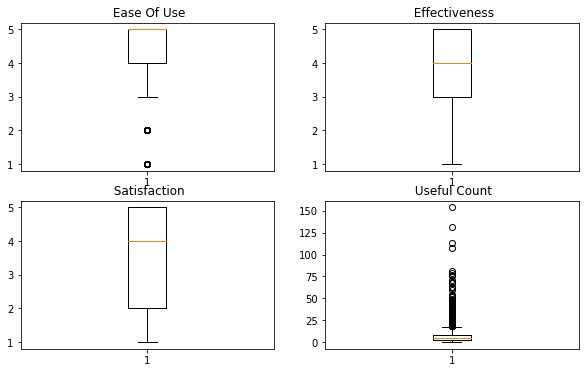

In [115]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_lex["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_lex["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_lex["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_lex["UsefulCount"])
plt.title(" Useful Count")
plt.show()

Outliers are present in Ease of use and Useful count

# Removing Outliers

In [116]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [117]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount', 'EaseofUse']:
    index_list.extend(outliers(data_lex,feature))
index_list

[28963,
 28991,
 29179,
 29271,
 29321,
 29348,
 29360,
 29366,
 29405,
 29447,
 29558,
 29672,
 29882,
 29927,
 30104,
 30245,
 30332,
 30431,
 30536,
 30548,
 30596,
 30737,
 30791,
 30806,
 30809,
 30824,
 30845,
 30854,
 30881,
 30887,
 30917,
 30938,
 30944,
 30965,
 30971,
 30992,
 31019,
 31031,
 31043,
 31055,
 31067,
 31076,
 31133,
 31136,
 31196,
 31220,
 31232,
 31259,
 31262,
 31376,
 31589,
 31601,
 31727,
 31949,
 31991,
 32096,
 32180,
 32306,
 32314,
 32345,
 32347,
 32350,
 32353,
 32354,
 32360,
 32361,
 32367,
 32369,
 32495,
 32501,
 32502,
 32653,
 32716,
 32724,
 32764,
 32771,
 32772,
 32774,
 32776,
 32777,
 32808,
 32821,
 32827,
 32840,
 32844,
 32869,
 32907,
 32910,
 32916,
 32918,
 32930,
 32949,
 32967,
 33016,
 33049,
 33063,
 33064,
 33066,
 33069,
 33071,
 33074,
 33075,
 33148,
 33151,
 33184,
 33212,
 33240,
 33272,
 33279,
 33286,
 33300,
 33305,
 33314,
 33320,
 33351,
 33354,
 33355,
 33356,
 33359,
 33364,
 33385,
 33451,
 33469,
 33502,
 33551,


In [118]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [119]:
data_lex.shape

(3347, 14)

In [120]:
data_lex=remove(data_lex,index_list)

In [121]:
data_lex.shape

(2902, 14)

# After removing outliers

Text(0.5, 1.0, 'Box plot of Useful Count')

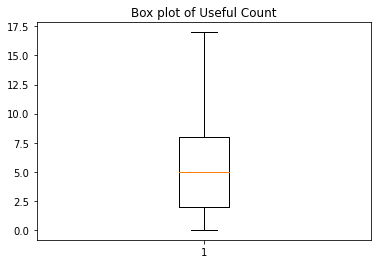

In [65]:
plt.boxplot(data_lex["UsefulCount"])
plt.title('Box plot of Useful Count')

Text(0.5, 1.0, 'Box plot of Ease Of Use')

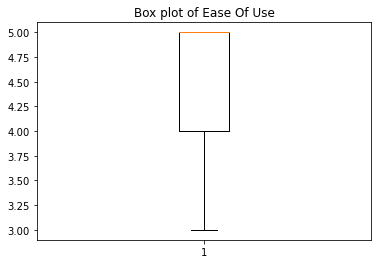

In [66]:
plt.boxplot(data_lex["EaseofUse"])
plt.title('Box plot of Ease Of Use')

# Satisfaction column

In [122]:
data_lex['Satisfaction'].value_counts()

5.0    1082
4.0     673
3.0     483
1.0     413
2.0     251
Name: Satisfaction, dtype: int64

Satisfaction column does not contain value greater than 5

# 7.Feature Engineering

In [123]:
data1=np.where(data_lex['Satisfaction'] == 1.0, "Nil", data_lex['Satisfaction'])
data1=np.where(data_lex['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_lex['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_lex['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_lex['Satisfaction'] == 5.0, "Extreme",data1)

In [124]:
data_lex['SideEffects']=data1

In [125]:
data_lex.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [126]:
data_lex.head(5)

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
28817,Michael Gallagher,Black,55-64,depression,1/23/2020,lexapro,5.0,3.0,It helped depression anxiety. And I trouble sl...,Male,nausea mouth trouble sleeping constipation tir...,0.0,Moderate
28826,Scott Mckee,Hispanic,65-74,depression,1/21/2020,lexapro,3.0,1.0,Was nauseated almost immediately. Diareaha bed...,Female,nausea mouth trouble sleeping constipation tir...,0.0,Nil
28834,Chelsea Payne,Hispanic,75-100,anxiousness associated with depression,12/27/2019,lexapro,4.0,2.0,seen much difference.,Female,nausea mouth trouble sleeping constipation tir...,0.0,Mild
28845,Randy Cooper,White,35-44,depression,12/20/2019,lexapro,5.0,5.0,I started taking Zoloft I diagnosed depression...,Male,nausea mouth trouble sleeping constipation tir...,2.0,Severe
28854,Mark Lowe,White,45-54,repeated episodes anxiety,12/9/2019,lexapro,5.0,5.0,Changed life. I’ve tried several ssri’s 10 yrs...,Female,nausea mouth trouble sleeping constipation tir...,0.0,Extreme


# 8.Feature Reduction

# Correlation Analysis

<AxesSubplot:>

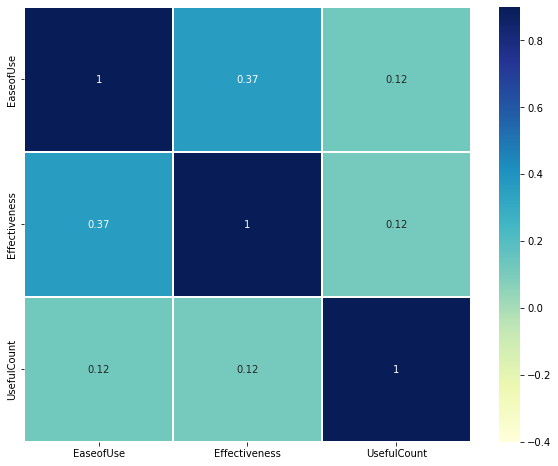

In [127]:
corrmatrix = data_lex.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

# The columns such as Date, Name, Reviews and UsefulCount are also dropped since these doesn't deal with side effects of the drug.

In [128]:
data_lex=data_lex.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_lex=data_lex.reset_index(drop=True)
data_lex.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Black,55-64,depression,5.0,3.0,Male,Moderate
1,Hispanic,65-74,depression,3.0,1.0,Female,Nil
2,Hispanic,75-100,anxiousness associated with depression,4.0,2.0,Female,Mild
3,White,35-44,depression,5.0,5.0,Male,Severe
4,White,45-54,repeated episodes anxiety,5.0,5.0,Female,Extreme


In [129]:
data_lex.shape

(2902, 7)

# 9.Encoding

In [130]:
#Finding categorical columns and chnaging datatype
for cl in data_lex.select_dtypes(include = ['object']):
    data_lex[cl]=data_lex[cl].astype('category')
data_lex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           2902 non-null   category
 1   Age            2902 non-null   category
 2   Condition      2902 non-null   category
 3   EaseofUse      2902 non-null   float64 
 4   Effectiveness  2902 non-null   float64 
 5   Sex            2902 non-null   category
 6   SideEffects    2902 non-null   category
dtypes: category(5), float64(2)
memory usage: 60.9 KB


In [131]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [132]:
data_lex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           2902 non-null   category
 1   Age            2902 non-null   category
 2   Condition      2902 non-null   category
 3   EaseofUse      2902 non-null   float64 
 4   Effectiveness  2902 non-null   float64 
 5   Sex            2902 non-null   category
 6   SideEffects    2902 non-null   category
dtypes: category(5), float64(2)
memory usage: 60.9 KB


In [133]:
data_lex.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Black,55-64,depression,5.0,3.0,Male,Moderate
1,Hispanic,65-74,depression,3.0,1.0,Female,Nil
2,Hispanic,75-100,anxiousness associated with depression,4.0,2.0,Female,Mild
3,White,35-44,depression,5.0,5.0,Male,Severe
4,White,45-54,repeated episodes anxiety,5.0,5.0,Female,Extreme


In [134]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects']:   
    data_lex[col]=label.fit_transform((data_lex[col]).astype(str))
    
data_label=data_lex

In [135]:
data_lex.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,1,6,3,5.0,3.0,1,2
1,2,7,3,3.0,1.0,0,3
2,2,9,0,4.0,2.0,0,1
3,3,4,3,5.0,5.0,1,4
4,3,5,9,5.0,5.0,0,0


In [136]:
data_lex.shape

(2902, 7)

# 10.Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_lex[scale] = ss.fit_transform(data_lex[scale])

In [138]:
data_lex.shape

(2902, 7)

# EDA

# 1.Top 20 Drugs by usage

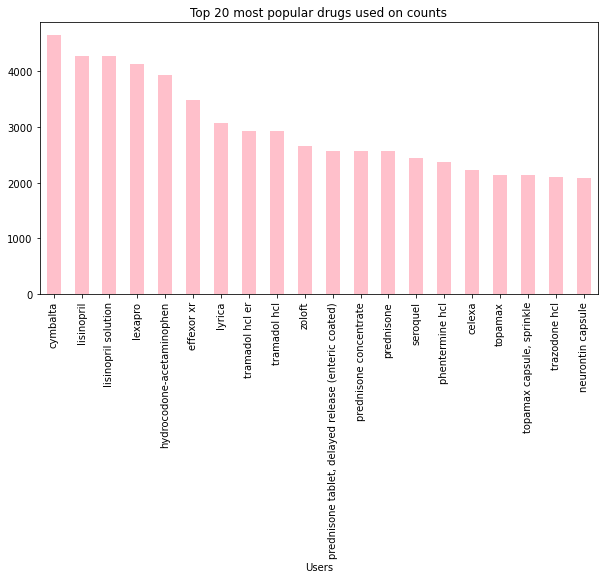

In [193]:
plt.figure(figsize=(10,5))
data['Drug'].value_counts().nlargest(20).plot(kind='bar',color='pink')
plt.xlabel('Users')
plt.title("Top 20 most popular drugs used on counts")
plt.show()

Out of 7000 drugs Cymbalta is most used drug and lisinopril follows second place.

# 2. Users by Race and Gender

Text(0.5, 1.0, 'Users by Race and Gender')

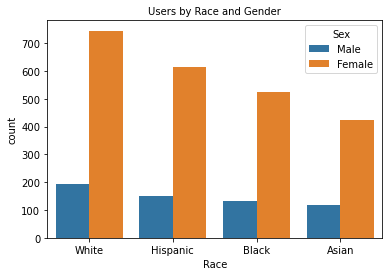

In [74]:
sns.countplot(x='Race',hue='Sex',data=data_lex)
plt.title("Users by Race and Gender", fontsize = 10)

Females dominate in all race for the usage of Lexopra drug

# 3.Users by Gender

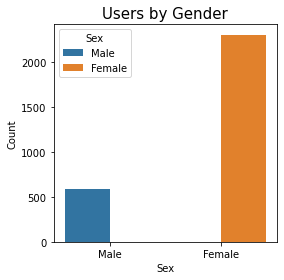

In [79]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', hue='Sex',data=data_lex)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

Female counts standsmore than male count in Overall usage of Lexopra drug 

# 4.Conditions Lexapro

Text(0, 0.5, 'Count')

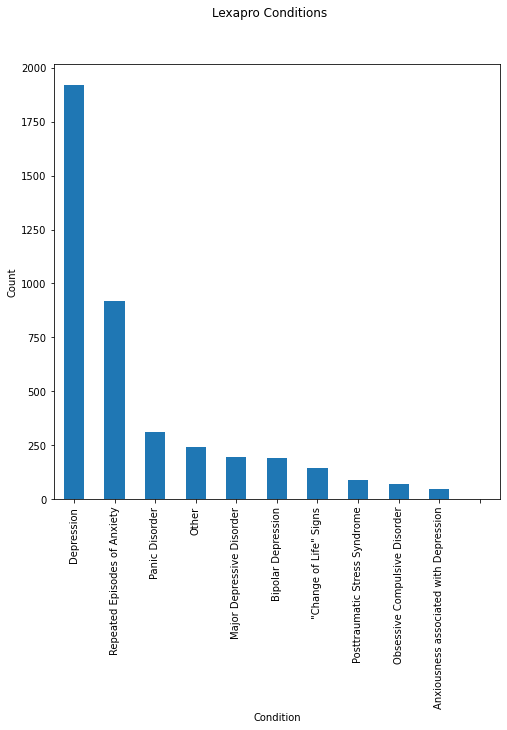

In [76]:
drug_lexapro['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Lexapro Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

Lexapro is used for 10 conditions.Most users consume the drug for depression.

# 5.Users by Age and Gender

Text(0.5, 1.0, 'Users by Age and Gender')

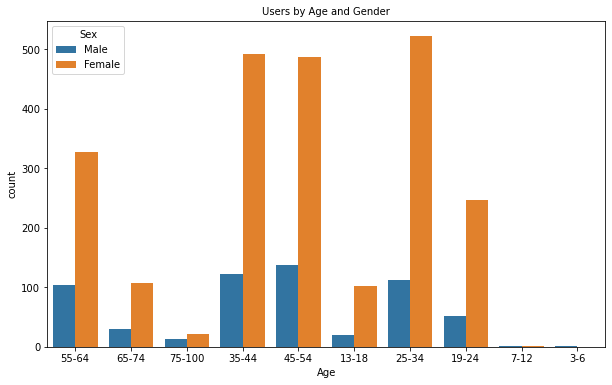

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_lex)
plt.title("Users by Age and Gender", fontsize = 10)

Female users count is greater than male in all age groups.Main users are in the age group between 19 to 44.

# 6.Users by Age and Side effects

Text(0.5, 1.0, 'Users by Age and Gender')

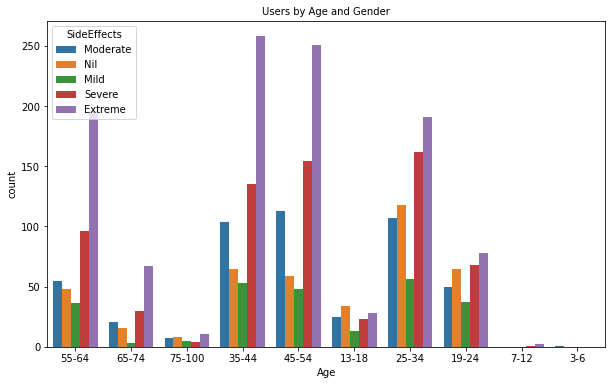

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_lex)
plt.title("Users by Age and Side effects", fontsize = 10)

# 7. Top 20 Conditions

Text(0, 0.5, 'Users')

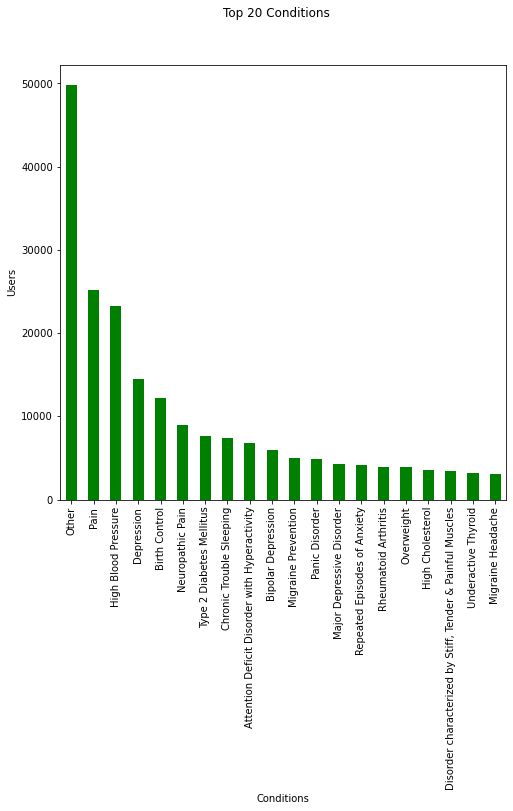

In [147]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8),color='green')
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

Of 1806 Conditions, Other Conditions tops the chart followed respectively by Pain and High Blood Pressure.

# 8.Users by Race 

Text(0, 0.5, 'Count')

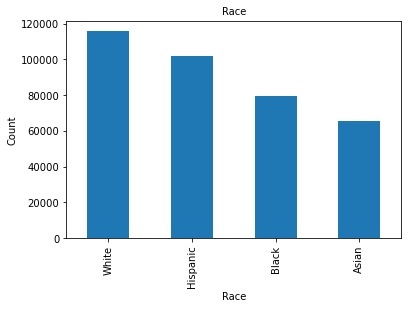

In [33]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

The usage of drugs is greater in white race than all other race.

# 9. Side effects -Lexopra

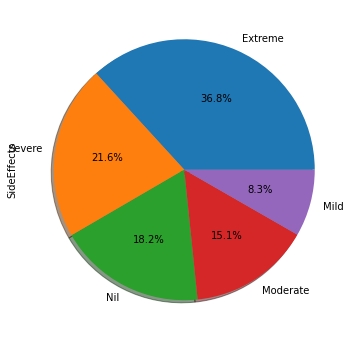

In [40]:
plt.figure(figsize=(6,6))
data_lex['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Extremely Severe Side Effects accounted for the most closely followed by No Side Effects. Mild symptoms accounted for the least

# 10.Usage by Gender and Effectiveness

<Figure size 720x576 with 0 Axes>

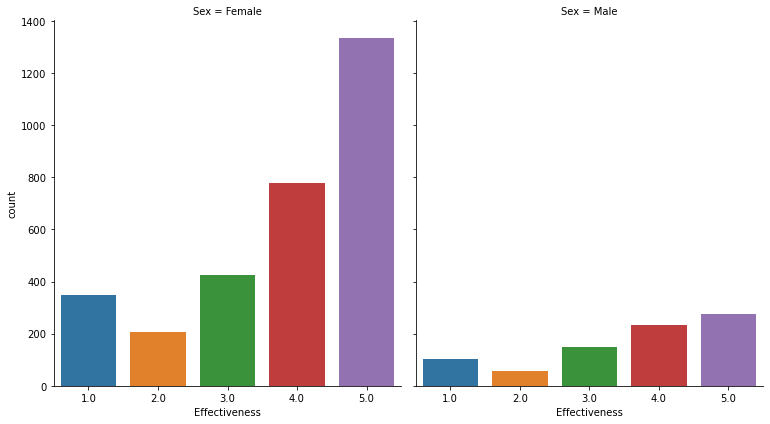

In [45]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_lex, kind="count",
                height=6,aspect =.9);

Lexopra  medicine is found more effcetive in females.

# Splitting the Data

In [139]:
#target
y = data_lex['SideEffects']

In [140]:
X = data_lex.drop(['SideEffects'],axis=1)

In [141]:
X.shape

(2902, 6)

# Splitting the dataset into test and train

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [143]:
X_train.shape

(2321, 6)

In [144]:
X_test.shape

(581, 6)

In [145]:
y_train.shape

(2321,)

In [146]:
y_test.shape

(581,)

# Modelling

# 1.Logistic Regression Model

In [222]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

# Performance Evaluation

In [223]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  66.95352839931154


In [182]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.6695352839931153


# Confusion Matrix of Logistic Regression Model

In [167]:
confusion_matrix(y_test,y_pred)

array([[193,   0,   2,   0,  18],
       [  9,   0,  31,  16,   6],
       [ 18,   0,  39,   6,  23],
       [  6,   0,   8,  84,   7],
       [ 28,   0,  14,   0,  73]], dtype=int64)

# 2. KNN Model

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [170]:
acc_values

[0.5611015490533563,
 0.5662650602409639,
 0.5697074010327022,
 0.5834767641996558,
 0.5697074010327022,
 0.5972461273666093,
 0.5851979345955249,
 0.5903614457831325,
 0.5869191049913941,
 0.5869191049913941,
 0.576592082616179,
 0.5834767641996558]

# To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values

Text(0, 0.5, 'accuracy')

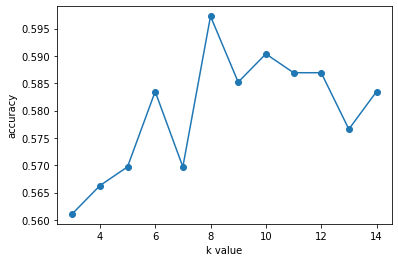

In [171]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

# KNN Model with k=12

In [172]:
classifier = KNeighborsClassifier(n_neighbors= 12, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Performance Evaluation

In [173]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  58.69191049913941


In [174]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.5869191049913941


# Confusion Matrix of KNN Classifier

In [222]:
confusion_matrix(y_test,y_pred)

array([[193,   0,   4,   0,  16],
       [ 11,   4,  15,  12,  20],
       [ 24,   8,  23,   1,  30],
       [  8,   2,  16,  74,   5],
       [ 42,   0,  23,   0,  50]], dtype=int64)

# 3.Decision Tree Classifier

In [183]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

# Performance Evaluation

In [184]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  58.17555938037866


In [185]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.5817555938037866


# Confusion Matrix of Decision Tree Model

In [225]:
confusion_matrix(y_test,y_pred)

array([[181,   2,   6,   0,  24],
       [ 11,  11,  23,   9,   8],
       [ 20,  19,  25,   4,  18],
       [  8,  13,  10,  68,   6],
       [ 34,   8,  17,   2,  54]], dtype=int64)

# 4.Support Vector machine

# a Linear SVM

In [186]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

# Performance evaluation

In [187]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  67.46987951807229


In [188]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.6746987951807228


# Confusion Matrix of Linear SVM Model

In [228]:
confusion_matrix(y_test,y_pred)

array([[195,   0,   2,   0,  16],
       [  9,   0,  31,  16,   6],
       [ 19,   0,  39,   6,  22],
       [  7,   0,   8,  84,   6],
       [ 30,   0,  11,   0,  74]], dtype=int64)

# b. Polynomial SVM

In [189]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

# Performance Evaluation

In [190]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  61.2736660929432


In [191]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.612736660929432


# Confusion Matrix of Linear SVM Model

In [231]:
confusion_matrix(y_test,y_pred)

array([[199,   0,   1,   0,  13],
       [ 14,   1,  23,  12,  12],
       [ 27,   0,  30,   5,  24],
       [  9,   2,  10,  75,   9],
       [ 44,   0,  10,   0,  61]], dtype=int64)

# c. Radial SVM

In [192]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

# Performance Evaluation

In [193]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  66.7814113597246


In [194]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.6678141135972461


# Confusion Matrix of Radial SVM Model

In [234]:
confusion_matrix(y_test,y_pred)

array([[195,   0,   2,   0,  16],
       [  9,   0,  32,  13,   8],
       [ 19,   0,  38,   5,  24],
       [  6,   0,  11,  81,   7],
       [ 30,   0,  11,   0,  74]], dtype=int64)

# 5.Random Forest Classifier

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

# Performance Evaluation

In [199]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  61.10154905335629


In [200]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.6110154905335629


# Confusion Matrix of Random forest classifier

In [238]:
confusion_matrix(y_test,y_pred)

array([[180,   1,   4,   0,  28],
       [ 11,   8,  28,   8,   7],
       [ 19,  11,  33,   4,  19],
       [  7,   8,   8,  76,   6],
       [ 31,   6,  19,   1,  58]], dtype=int64)

# Fine Tuning of Hyper Parametrs

In [206]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [207]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [208]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [209]:
y_pred=rft.predict(X_test)

In [210]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  66.09294320137694


In [211]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.6609294320137694


# 6.Gradient Boosting

In [215]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

# Performance evaluation

In [216]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  65.23235800344234


In [218]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.6523235800344234


# Confusion Matrix of Gradient Boosting

In [246]:
confusion_matrix(y_test,y_pred)

array([[190,   0,   2,   0,  21],
       [  9,  10,  29,   6,   8],
       [ 19,   4,  38,   3,  22],
       [  6,   9,   8,  75,   7],
       [ 28,   0,  16,   0,  71]], dtype=int64)

# 7.Extreme Gradient Boosting

In [147]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [219]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

# Performance Evaluation

In [220]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  62.306368330464714


In [221]:
print("f1 score is" ,f1_score(y_test,y_pred,  pos_label='positive', average='micro'))

f1 score is 0.6230636833046471


# Confusion Matrix of Extra gradient boosting

In [154]:
confusion_matrix(y_test,y_pred)

array([[185,   1,   3,   0,  24],
       [  8,   9,  23,  12,  10],
       [ 18,   7,  34,   4,  23],
       [  7,  15,   9,  69,   5],
       [ 31,   2,  14,   3,  65]], dtype=int64)

# Inference


Accuracies of classification models:

1.Logistic Regression - 66.95%

2.KNN Model - 58.69%

3.Decision Tree Classifier - 58.17%

4.Support Vector Machine:

    a.Linear SVM - 67.46%

     b.Polynomial SVM - 61.27%

     c.Radial SVM - 66.78%

5.Random Forest - 61.10%
  Fine-tuning Random Forest - 66.26%


6.Gradient Boosting - 65.23%

7. Extereme Gradient Boosting - 62.30%


The best classification model was obtained by Linear Support Vector Machine. On performance evaluation, maximum accuracy of 67.46% has been achieved.